<a href="https://colab.research.google.com/github/annefrancine/Machine_Learning/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
https://www.kaggle.com/c/competicao-dsa-machine-learning-jan-2019


In [0]:
import os
path = os.getcwd()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import pandas.util.testing as tm
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pima = pd.read_csv('/content/drive/My Drive/DSA/56-01-Solution-Competition-DSA-Jan-2019/diabetes.csv', 
                   header = None, sep = ",",
                   names=['Pregnancy', 'Glucose', 'BloodPressure' ,'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Class'])   

In [16]:
pima.head(5)

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinfoldThickness         768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [18]:
pima.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
pima[pima.isnull().any(axis=1)] 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class


In [20]:
pima.isnull().sum()

Pregnancy                   0
Glucose                     0
BloodPressure               0
SkinfoldThickness           0
Insulin                     0
BodyMassIndex               0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

## Exploratory analysis 

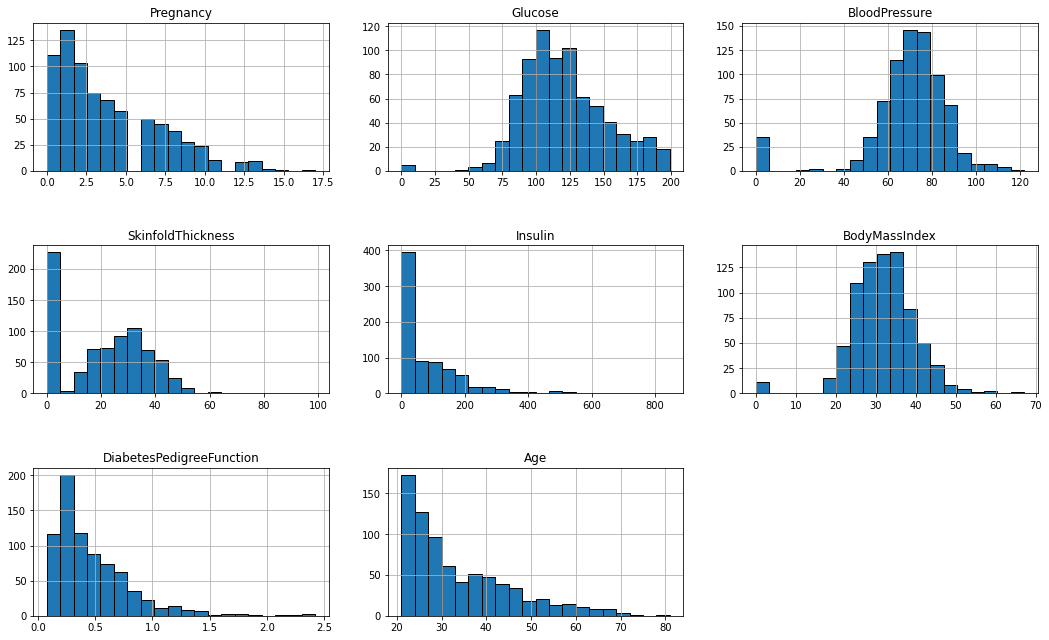

In [21]:
# data analysis
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

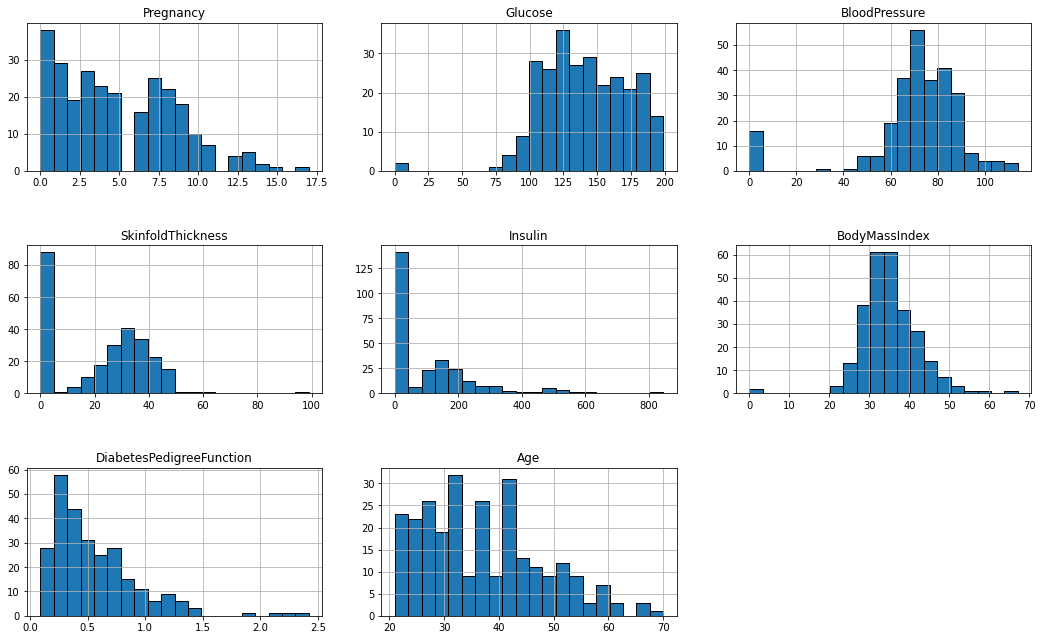

In [22]:
# Diabete data analysis
pima1=pima[pima['Class']==1]
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

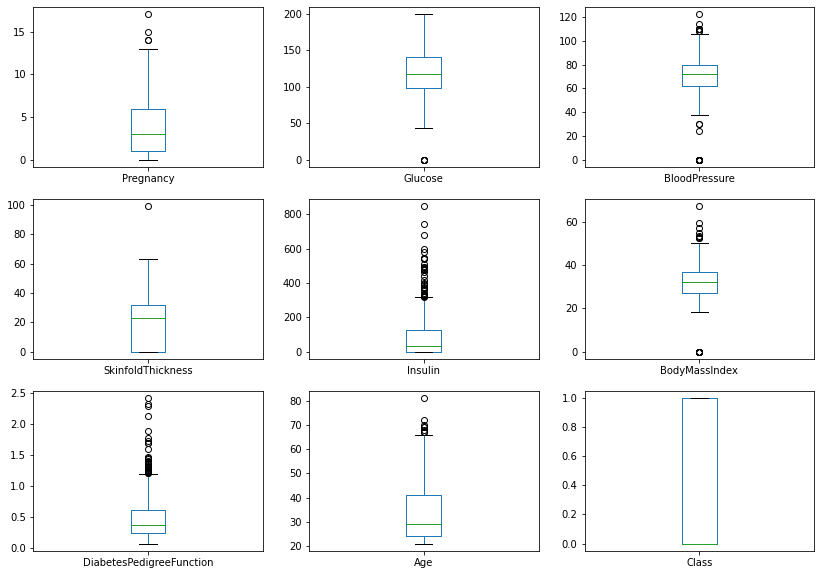

In [23]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(14,10))

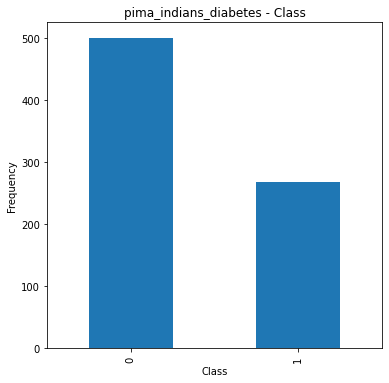

In [24]:
pima['Class'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('pima_indians_diabetes - Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Relationship between attributes

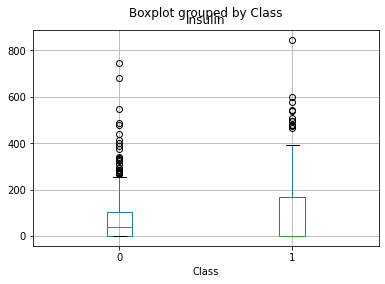

In [25]:
pima.boxplot(column='Insulin',by='Class')
plt.show()

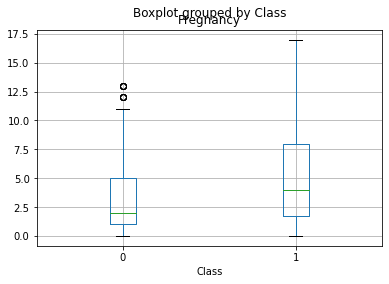

In [26]:
pima.boxplot(column='Pregnancy',by='Class')
plt.show()

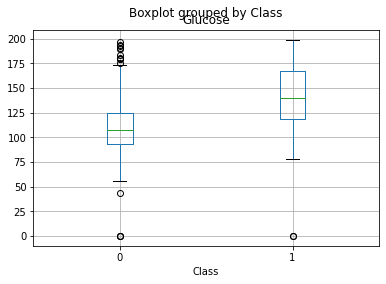

In [27]:
pima.boxplot(column='Glucose',by='Class')
plt.show()

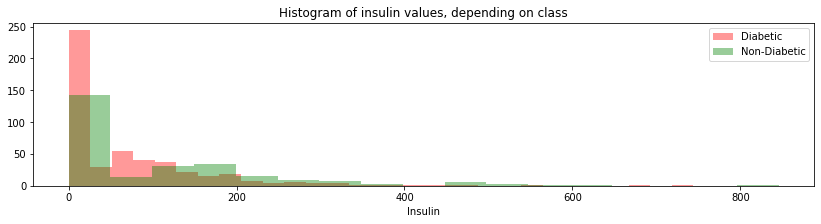

In [28]:
plt.figure(figsize=(14,3))
Insulin_plt = pima.groupby(pima['Insulin']).Class.count().reset_index()
sns.distplot(pima[pima.Class == 0]['Insulin'], color='red', kde=False, label='Diabetic')
sns.distplot(pima[pima.Class == 1]['Insulin'], color='green', kde=False, label='Non-Diabetic')
plt.legend()
plt.title('Histogram of insulin values, depending on class')
plt.show()

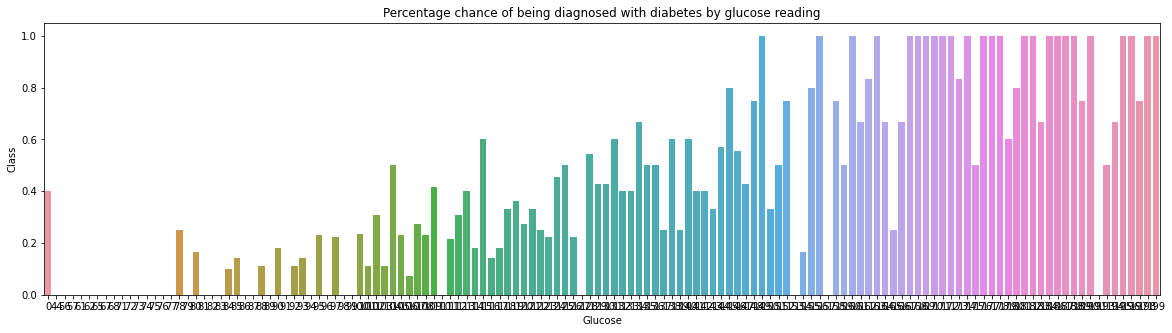

In [29]:
plt.figure(figsize=(20,5))
glucose_plt = pima.groupby('Glucose').Class.mean().reset_index()
sns.barplot(glucose_plt.Glucose, glucose_plt.Class)
plt.title('Percentage chance of being diagnosed with diabetes by glucose reading')
plt.show()

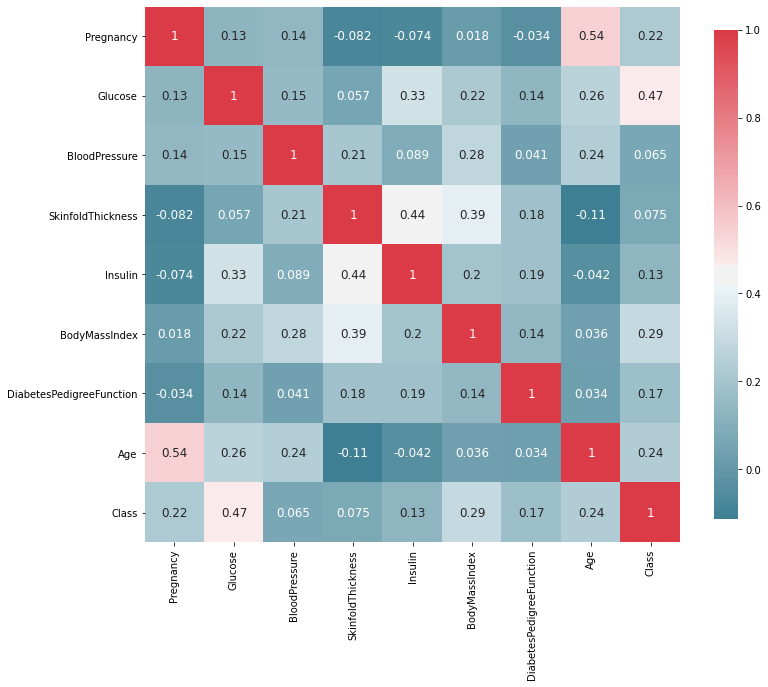

In [30]:
corr = pima.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

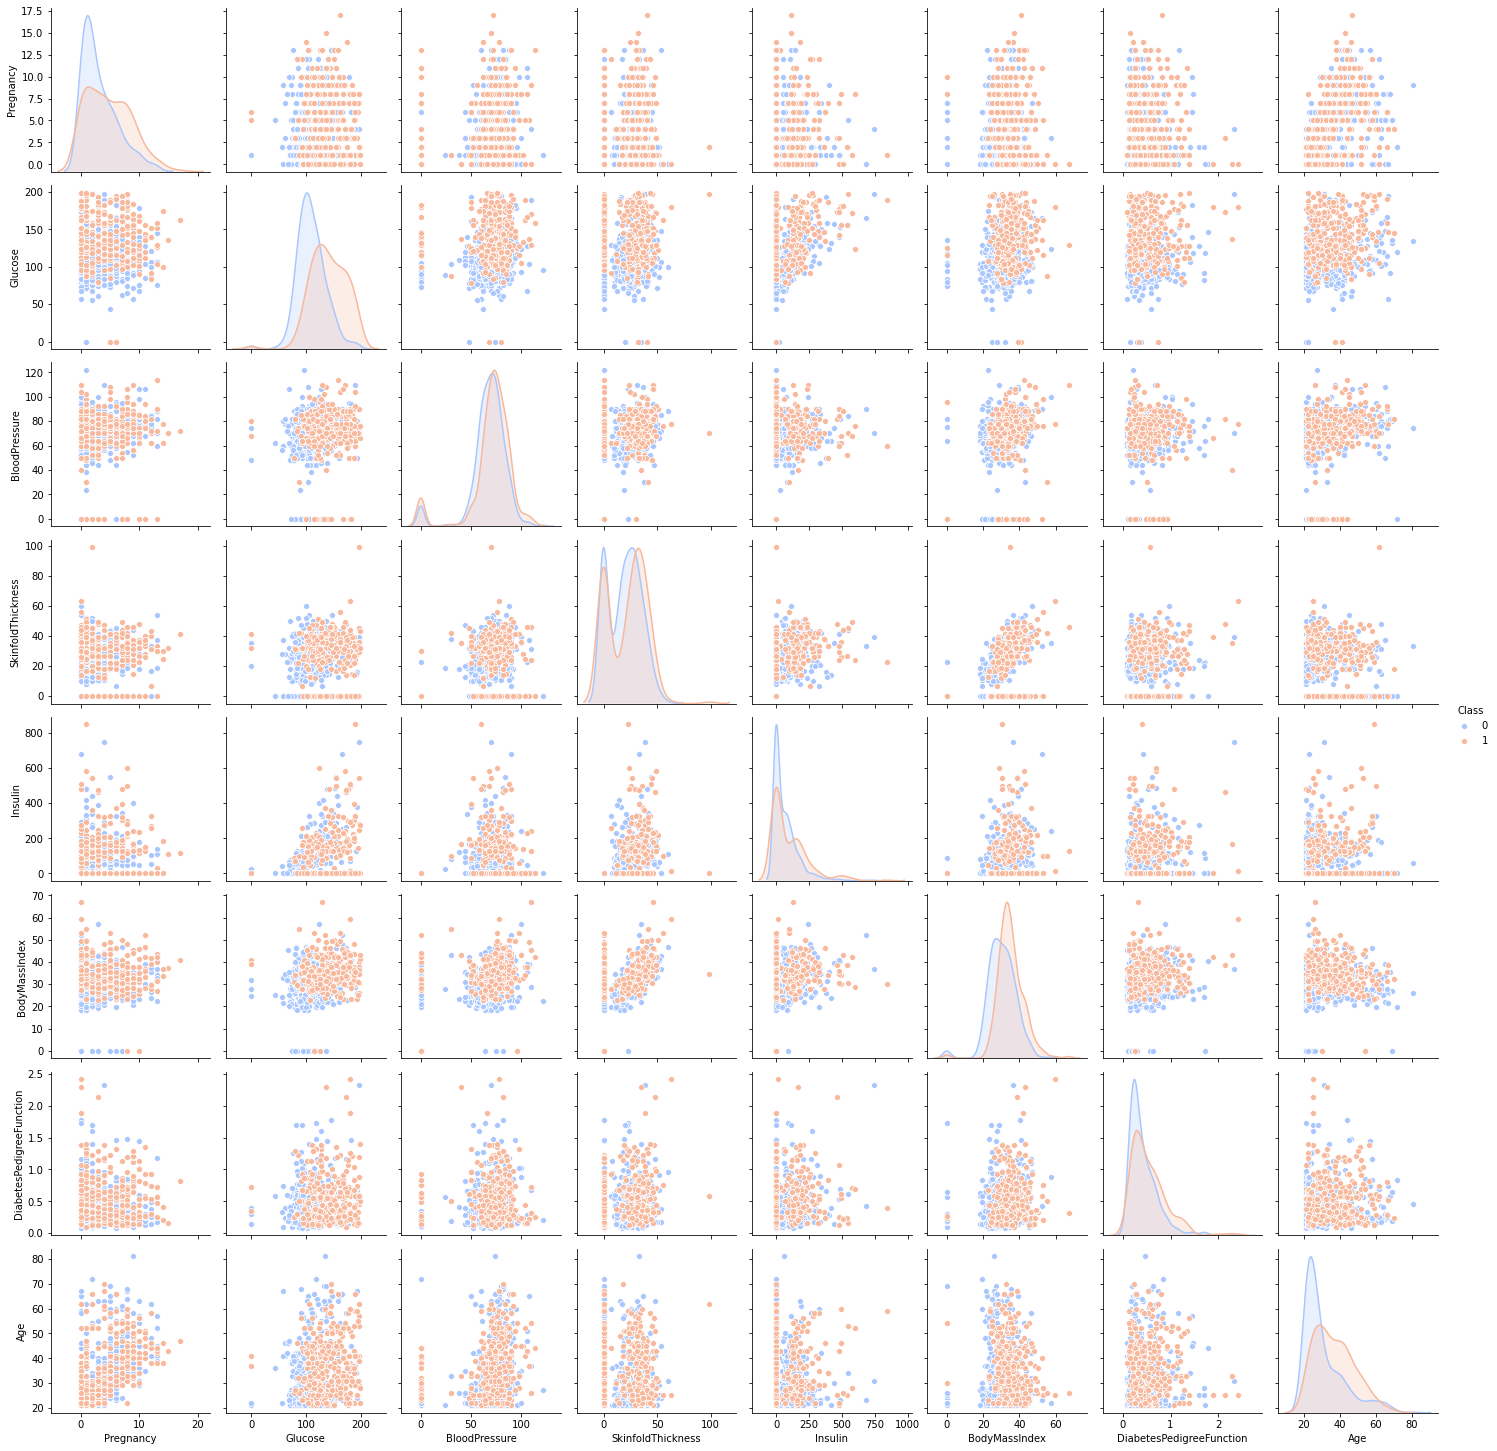

In [31]:
import seaborn as sns
sns.pairplot(pima,hue='Class',palette='coolwarm')

## Data cleaning

In [32]:
# checking values ​​with zero
print(" missing values: " + repr(pima[pima.Glucose == 0].shape[0]))
print(pima[pima.Glucose == 0].groupby('Class')['Class'].count())

 missing values: 5
Class
0    3
1    2
Name: Class, dtype: int64


In [0]:
# Replace the zero value with the average 
Glucose_0 = pima[(pima['Glucose']== 0)]
pima[(pima['Glucose']== 0) & (pima['Class'] == 0)] = Glucose_0[Glucose_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Glucose']== 0) & (pima['Class'] == 1)] = Glucose_0[Glucose_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [34]:
# checking values with zero
print(" missing values: " + repr(pima[pima.BloodPressure == 0].shape[0]))
print(pima[pima.BloodPressure == 0].groupby('Class')['Class'].count())

 missing values: 35
Class
0    19
1    16
Name: Class, dtype: int64


In [0]:
# Replace the zero value with the average 
BloodPressure_0 = pima[(pima['BloodPressure']== 0)]
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 0)] = BloodPressure_0[BloodPressure_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 1)] = BloodPressure_0[BloodPressure_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [36]:
# checking values with zero
print(" missing values: " + repr(pima[pima.SkinfoldThickness == 0].shape[0]))
print(pima[pima.SkinfoldThickness == 0].groupby('Class')['Class'].count())

 missing values: 194
Class
0    121
1     73
Name: Class, dtype: int64


In [0]:
# Replace the zero value with the average
SkinfoldThickness_0 = pima[(pima['SkinfoldThickness']== 0)]
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 0)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 1)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [38]:
# checking values with zero
print("Number of abnormal cases in the thickness of skin folds: " + repr(pima[pima.SkinfoldThickness > 60].shape[0]))
print(pima[pima.SkinfoldThickness > 60]['SkinfoldThickness'])
print(pima[pima.SkinfoldThickness > 60].groupby('Class')['Class'].count())

Number of abnormal cases in the thickness of skin folds: 2
446    63.0
580    99.0
Name: SkinfoldThickness, dtype: float64
Class
1    2
Name: Class, dtype: int64


In [0]:
# Replacing impossible value with average 
pima['SkinfoldThickness'].iloc[579] = pima['SkinfoldThickness'].mean()

In [40]:
# checking values with zero
print(" missing values: " + repr(pima[pima.Insulin == 0].shape[0]))
print(pima[pima.Insulin == 0].groupby('Class')['Class'].count())

 missing values: 141
Class
0    94
1    47
Name: Class, dtype: int64


In [0]:
# checking values with zero
Insulin_0 = pima[(pima['Insulin'] == 0)]
pima[(pima['Insulin']== 0) & (pima['Class'] == 0)] = Insulin_0[Insulin_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Insulin']== 0) & (pima['Class'] == 1)] = Insulin_0[Insulin_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [42]:
# Replace the zero value with the average
print("missing values: " + repr(pima[pima.BodyMassIndex == 0].shape[0]))
print(pima[pima.BodyMassIndex == 0].groupby('Class')['Class'].count())

missing values: 1
Class
0    1
Name: Class, dtype: int64


In [0]:
# Replace the zero value with the average
BodyMassIndex_0 = pima[(pima['BodyMassIndex']== 0)] 
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 0)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 1)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [44]:
pima.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.770604,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.144460,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


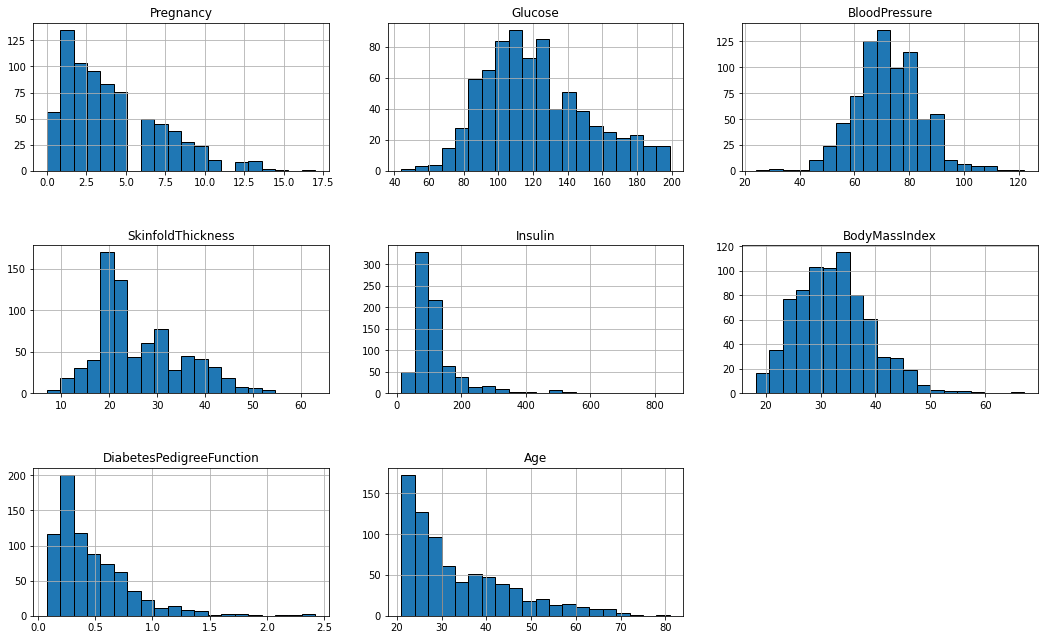

In [45]:
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

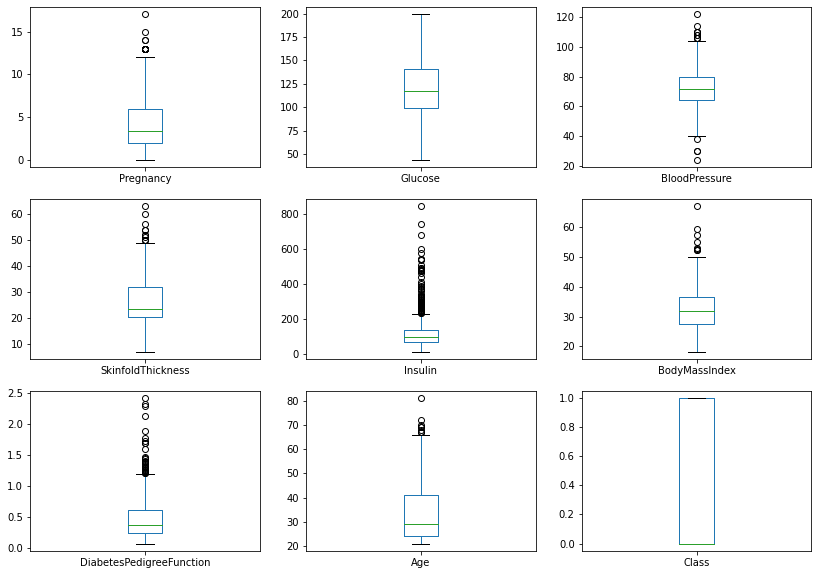

In [46]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(14,10))

## Data Modeling

In [47]:
pima.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [0]:
random_state=12342

In [49]:
!pip install imblearn

In [0]:
import imblearn
# Obs: pode ser necessário reiniciar o Jupyter para poder carregar o pacote

In [0]:
# Dados de oversampling são indicados com um sufixo de 'o'
np.random.seed(75)
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(pima, pima.Class)

In [52]:
data_o.shape

(1000, 9)

In [53]:
target_o.shape

(1000,)

In [54]:
import collections
collections.Counter(target_o)

Counter({0: 500, 1: 500})

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data_o, target_o, test_size=0.20, random_state=4)

In [57]:
Xo_train.shape

(800, 9)

In [58]:
yo_train.shape

(800,)

In [59]:
Xo_test.shape

(200, 9)

In [60]:
yo_test.shape

(200,)

In [0]:
data=pima[pima.columns[:8]]
target=pima['Class']

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = data.iloc[:, 0:8].columns
data[cols] = scaler.fit_transform(data)
data.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age
1,0.352941,0.670968,0.489796,0.500000,0.146992,0.314928,0.234415,0.483333
2,0.058824,0.264516,0.428571,0.392857,0.090194,0.171779,0.116567,0.166667
3,0.470588,0.896774,0.408163,0.292941,0.111922,0.104294,0.253629,0.183333
4,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000
5,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000


In [0]:
#data[cols] = preprocessing.scale(data)

In [0]:
train,test=train_test_split(pima,test_size=0.20,random_state=437,stratify=pima['Class'])

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Class']
y_test=test['Class']

## K-Nearest Neighbours Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

In [67]:
knn.fit(Xo_train, yo_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(Xo_test)

In [69]:
pred.shape

(200,)

In [70]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(yo_test,pred))

[[81 22]
 [ 9 88]]


In [0]:
from sklearn.metrics import classification_report

In [72]:
print (classification_report(yo_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.80      0.91      0.85        97

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



### Normalization

In [0]:
from sklearn import preprocessing
data_on = preprocessing.scale(data_o)
Xon_train, Xon_test, yon_train, yon_test = train_test_split(data_on, target_o, test_size=0.20, random_state=4)

In [74]:
knn.fit(Xon_train, yon_train)
pred = knn.predict(Xon_test)
print (confusion_matrix(yon_test,pred))

[[102   1]
 [  0  97]]


In [75]:
print (classification_report(yon_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



### K-value Optimisation

Text(0, 0.5, 'Error Rate')

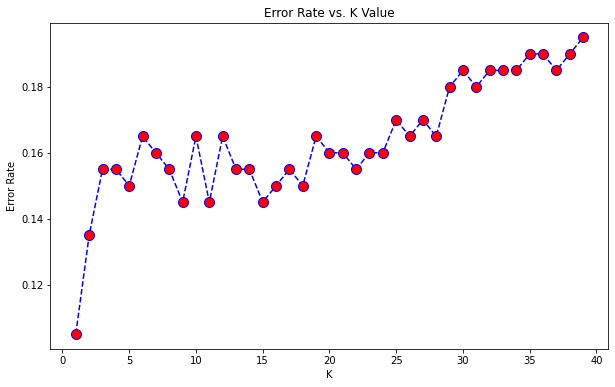

In [76]:
import numpy as np 
import matplotlib.pyplot as plt

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xo_train,yo_train)
    pred_i = knn.predict(Xo_test)
    error_rate.append(np.mean(pred_i != yo_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Função de peso usada na previsão. Valores possíveis:

'Uniforme': pesos uniformes. Todos os pontos em cada neighborhood são ponderados igualmente.

'Distância': pontos de dados ponderados pelo inverso da distância. Nesse caso, os vizinhos mais próximos de um ponto de consulta terão uma influência maior do que os vizinhos mais distantes.

(callable): uma função definida pelo usuário que aceita uma matriz de distâncias e retorna uma matriz da mesma forma que contém os pesos.

Parâmetro de potência para a métrica Minkowski. Quando p = 1, isso equivale a usar manhattan_distance (l1) e euclidean_distance (l2) para p = 2. Para p arbitrário, minkowski_distance (l_p) é usado.

In [77]:
# Com K = 1 

knn = KNeighborsClassifier(n_neighbors=1, weights='distance',p=1)

knn.fit(Xo_train,yo_train)
pred = knn.predict(Xo_test)

print('Com K = 1')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(yo_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(yo_test,pred)
print(rpt_knn)

Com K = 1


Confusion Matrix
[[90 13]
 [ 2 95]]


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       103
           1       0.88      0.98      0.93        97

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



### Resource selection using Hill climbing method 

In [0]:
from sklearn.utils import shuffle
new_Ind = []

In [0]:
cur_MaxScore = 0.0

In [0]:
col_num = 8

In [0]:
col_Ind_Random = shuffle(range(0,col_num), random_state=13)

In [82]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data.values[:, new_Ind]
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(newData, target, test_size=0.2, random_state=1987)
    clf = KNeighborsClassifier(1)
    fit = clf.fit(Xs_train, ys_train)
    cur_Score = clf.score(Xs_test, ys_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score com " + str(len(new_Ind)) + " atributos selecionados: " + str(cur_Score))

Score com 1 atributos selecionados: 0.6493506493506493
Score com 2 atributos selecionados: 0.7922077922077922
Score com 3 atributos selecionados: 0.8051948051948052
Score com 4 atributos selecionados: 0.8181818181818182


Text(0, 0.5, 'Error Rate')

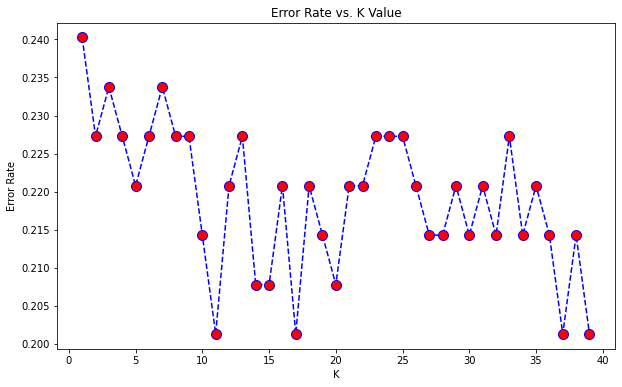

In [83]:
error_rate = []
random_state=19
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xs_train,ys_train)
    pred_i = knn.predict(Xs_test)
    error_rate.append(np.mean(pred_i != ys_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [84]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance',p=1)

knn.fit(Xs_train,ys_train)
pred = knn.predict(Xs_test)

print('WITH K=31')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(ys_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(ys_test,pred)
print(rpt_knn)

WITH K=31


Confusion Matrix
[[90 11]
 [16 37]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       101
           1       0.77      0.70      0.73        53

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



### KNN without SMOTE

Text(0, 0.5, 'Error Rate')

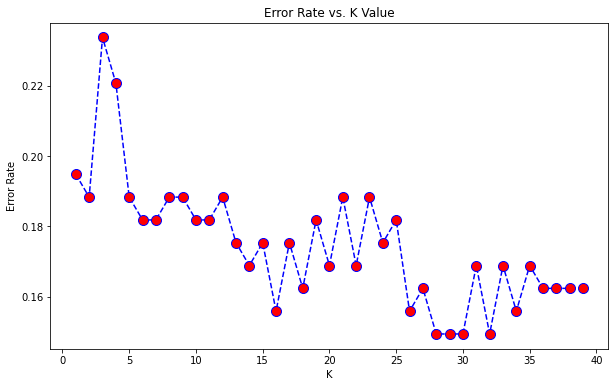

In [85]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance',p=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K = 31')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(y_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(y_test,pred)
print(rpt_knn)

Com K = 31


Confusion Matrix
[[86 14]
 [ 8 46]]


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.77      0.85      0.81        54

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154



## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
random_state=234
dtree = DecisionTreeClassifier(random_state=998)

In [88]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=998, splitter='best')

In [89]:
pred = dtree.predict(X_test)
print("Acurácia para o algoritmo decision tree classifier é",metrics.accuracy_score(pred,y_test))

Acurácia para o algoritmo decision tree classifier é 0.8311688311688312


In [90]:
print('Confusion Matrix')
cm_dtree = confusion_matrix(y_test,pred)
print(cm_dtree)
print('\n')
rpt_dtree = classification_report(y_test,pred)
print(rpt_dtree)

Confusion Matrix
[[86 14]
 [12 42]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.75      0.78      0.76        54

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



In [0]:
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(dtree, out_file='tree.dot', 
                         filled=True, rounded=True,  
                         special_characters=True) 

In [0]:
feat_names = pima.copy().iloc[:, 0:8].columns
targ_names = ['Yes','No']

In [93]:
!pip install graphviz

Caso tenha erro com o graphviz, você deve configurá-lo no seu SO:

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

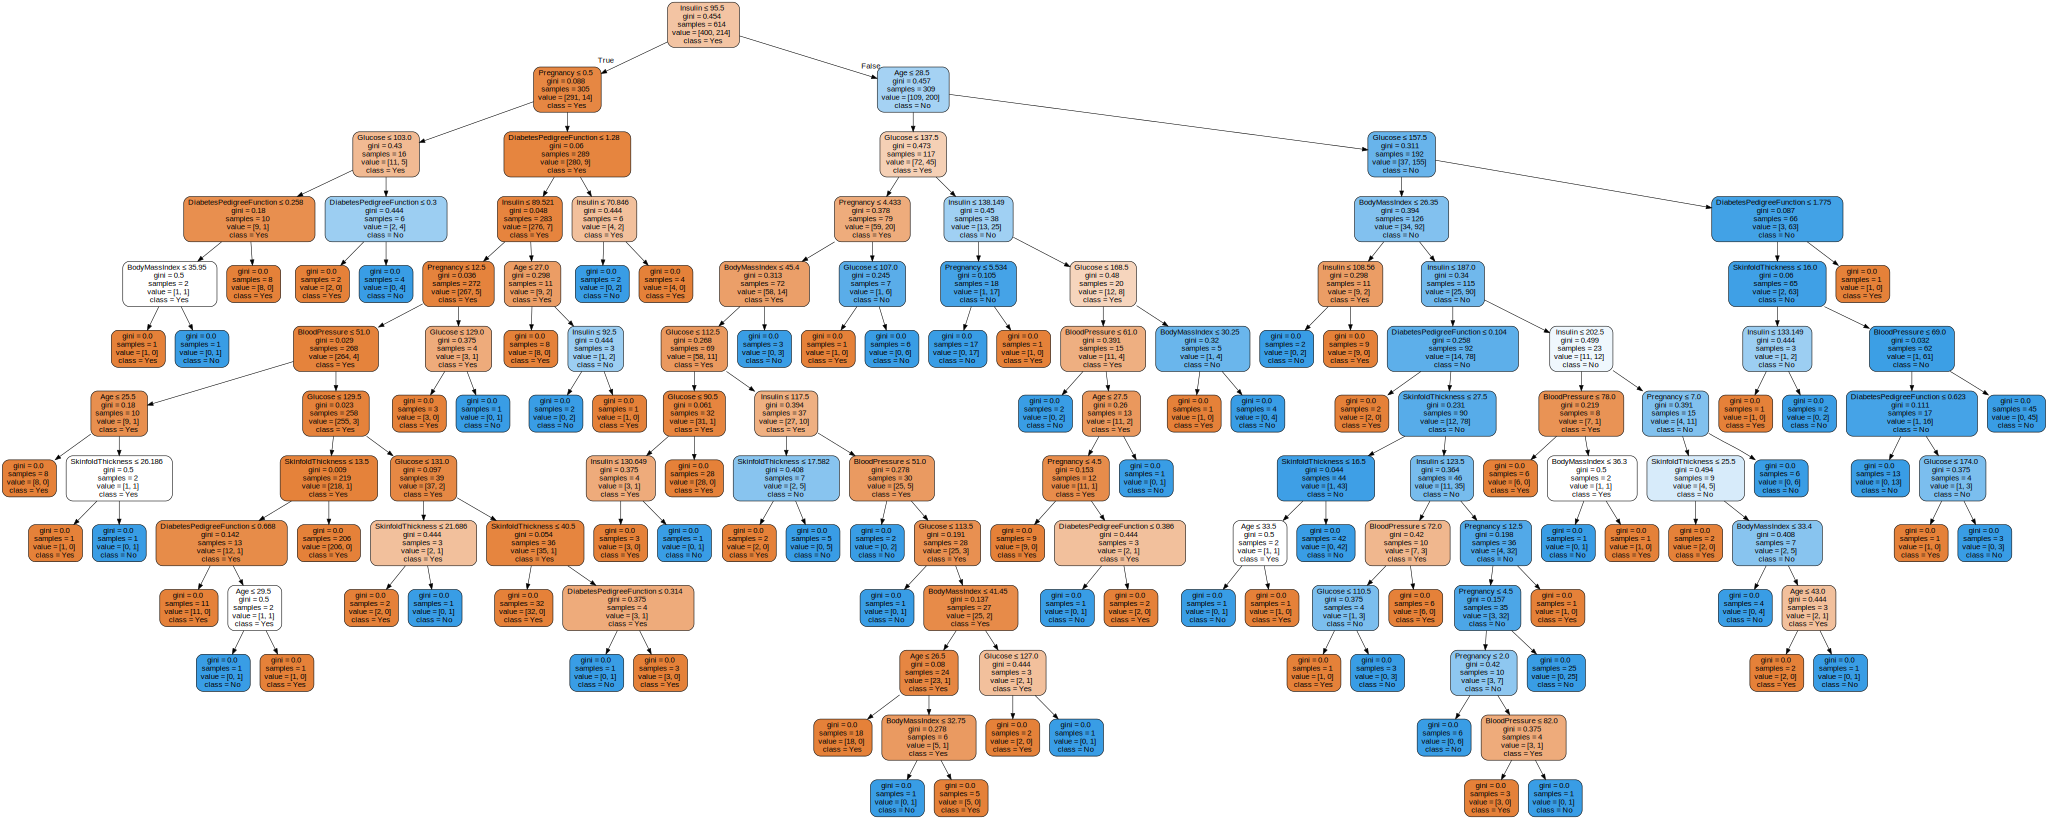

In [94]:
import graphviz
import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + path
from sklearn.tree import DecisionTreeClassifier,export_graphviz

import graphviz

data1 = export_graphviz(dtree,
                        out_file=None,
                        feature_names=feat_names,
                        class_names=targ_names,
                        filled=True, 
                        rounded=True,  
                        special_characters=True)

graph = graphviz.Source(data1)
graph

## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Number of base decision tree estimators
n_est = 100

# Maximum depth of any decision tree estimator
max_depth = 5

# Random state variable
rstate = 42

# start random forest
rf = RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)

In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pred = rf.predict(X_test)

In [99]:
print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[91  9]
 [ 5 49]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.84      0.91      0.88        54

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



In [129]:
# List of columns to be used to train each model

features = [col for col in list(X_train) ]
print('%i features (attributes): %s' % (len(features), features))

6 features (attributes): ['Pregnancy', 'Glucose', 'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'Age']


In [101]:
# Report with the most important resources to predict target variable 

# Collect ranking of the most "important" resources for E
importances =  rf.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('A característica mais importante para o diabetes é %s' % sorted_features[0])

A característica mais importante para o diabetes é Insulin


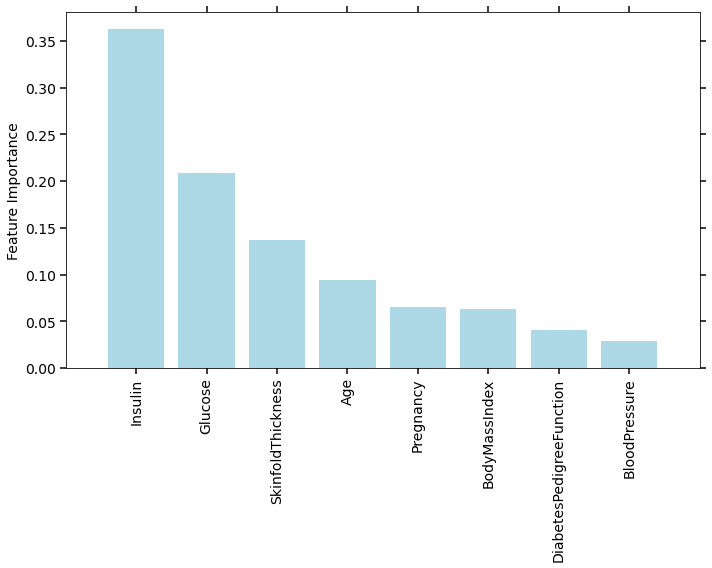

In [102]:
# Plot of the most important features

def plot_importances(X_train, sorted_features, sorted_importances):

    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances, color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Feature Importance', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(10,8))

ax = plot_importances(X_train, sorted_features, sorted_importances)

# plt.tight_layout()
plt.show()
plt.close()

## Model Comparison

In [103]:
temp=[]
classifier=['Decision Tree','Random Forest','KNN','KNN (Smote)']
models=[DecisionTreeClassifier(random_state=998),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate),KNeighborsClassifier(n_neighbors=6),"SMOTE"]
for i in models:
    model = i
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        model.fit(Xo_train,yo_train)
        pred1=model.predict(Xo_test)
        temp.append(metrics.accuracy_score(pred1,yo_test))
    else:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)    
        temp.append(metrics.accuracy_score(prediction,y_test))
        
models_dataframe=pd.DataFrame(temp,index=classifier)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Decision Tree,0.831169
Random Forest,0.909091
KNN,0.818182
KNN (Smote),0.925000


## Using the most important features

In [0]:
diab2=pima[['Pregnancy','Glucose','SkinfoldThickness','Insulin','BodyMassIndex','Age','Class']]

train1,test1=train_test_split(diab2,test_size=0.20,random_state=437,stratify=diab2['Class'])

X_train=train1[train1.columns[:6]]
X_test=test1[test1.columns[:6]]
y_train=train1['Class']
y_test=test1['Class']

# SMOTE
np.random.seed(795)
data1, target1 = SMOTE().fit_sample(diab2, diab2.Class)
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data1, target1, test_size=0.20, random_state=4)

In [105]:
temp=[]
classifier=['Decision Tree','Random Forest','KNN','KNN (Smote)']
models=[DecisionTreeClassifier(random_state=998),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate),KNeighborsClassifier(n_neighbors=6),"SMOTE"]
for i in models:
    model = i
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        model.fit(Xo_train,yo_train)
        pred1=model.predict(Xo_test)
        temp.append(metrics.accuracy_score(pred1,yo_test))
    else:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)    
        temp.append(metrics.accuracy_score(prediction,y_test))
        
models_dataframe=pd.DataFrame(temp,index=classifier)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Decision Tree,0.850649
Random Forest,0.902597
KNN,0.850649
KNN (Smote),0.880000


## Cross validation

In [0]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
kfold = KFold(n_splits=10, random_state=998) 

In [107]:
temp=[]
accuracy=[]
classifiers=['KNN','KNN (SMOTE)','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=6),"SMOTE", DecisionTreeClassifier(),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=938)]
for i in models:
    model = i
    
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        cv_result = cross_val_score(model,data_o,target_o, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
       
    else:
        cv_result = cross_val_score(model,data,target, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(temp,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
KNN,0.753794
KNN (SMOTE),0.910000
Decision Tree,0.802085
Random Forest,0.871138


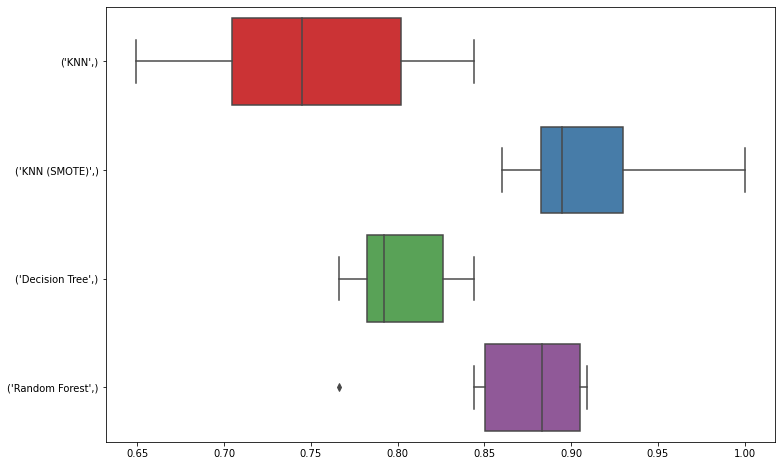

In [108]:
box=pd.DataFrame(accuracy,index=[classifiers])
fig3 = plt.figure(1, figsize=(12,8))
sns.boxplot(data=box.T, orient="h", palette="Set1")
plt.show()

# Tuning parameter  for Random Forest

In [109]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [110]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of resources to be considered in each division
max_features = ['auto', 'sqrt']

# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples needed to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Sample selection method to train each tree
bootstrap = [True, False]

# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [111]:
# Use random grid to look for the best hyperparameters
# First create the basic model to fit
rf = RandomForestClassifier()

# Random parameter search, using 3-fold cross-validation,
# Search 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit 
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [112]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [0]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [114]:
base_model = RandomForestClassifier(random_state = 82)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1169 degrees.
Accuracy = 88.31%.


In [115]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1299 degrees.
Accuracy = 87.01%.


In [116]:
print('Melhora de {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Melhora de -1.47%.


#  Tuning parameter  for  Decision Tree

In [117]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(dtree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 998,
 'splitter': 'best'}


In [118]:
from sklearn.model_selection import RandomizedSearchCV

# Number of resources to be considered in each division
max_features = ['auto', 'sqrt']

# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples needed to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Sample selection method to train each tree
bootstrap = [True, False]

random_state=294

# create random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}


In [119]:
# Use random grid to look for the best hyperparameters
# First create the basic model to fit
dtree = DecisionTreeClassifier()
random_state=194

# Random parameter search using 3-cross validation
# Search 100 different combinations and use all available cores
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=294, n_jobs = -1)

# Fit
dtree_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [120]:
dtree_random.best_params_

{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [121]:
base_model =  DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,random_state=474)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1753 degrees.
Accuracy = 82.47%.


In [122]:
pprint(base_model.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 474,
 'splitter': 'best'}


In [123]:
best_dtree_random = dtree_random.best_estimator_
best_dtree_random.fit(X_train, y_train)
random_accuracy = evaluate(best_dtree_random, X_test, y_test)

Model Performance
Average Error: 0.0974 degrees.
Accuracy = 90.26%.


In [124]:
print('best of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

best of 9.45%.


In [125]:
best_dtree_random

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dot_data = tree.export_graphviz(best_dtree_random, out_file='tree2.dot', 
                         filled=True, rounded=True,  
                         special_characters=True) 

In [127]:
temp=[]
accuracy=[]
classifiers=['KNN','KNN (SMOTE)','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=6),"SMOTE", best_dtree_random,best_random]
for i in models:
    model = i
    
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        cv_result = cross_val_score(model,data_o,target_o, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
       
    else:
        cv_result = cross_val_score(model,data,target, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(temp,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
KNN,0.753794
KNN (SMOTE),0.910000
Decision Tree,0.798189
Random Forest,0.876333


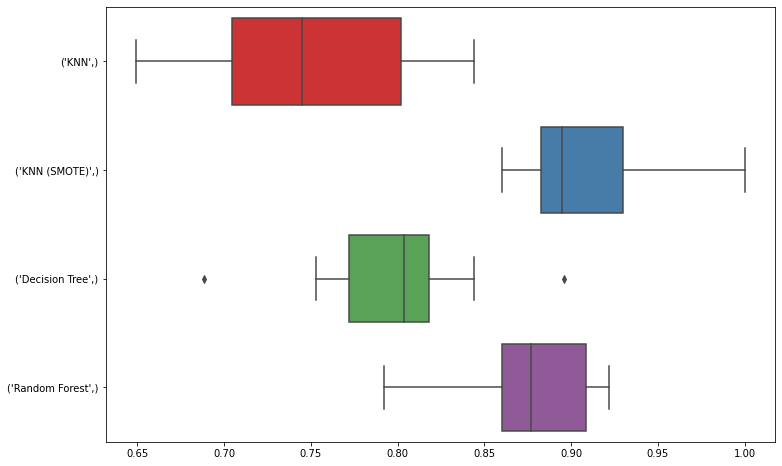

In [128]:
box=pd.DataFrame(accuracy,index=[classifiers])
fig3 = plt.figure(1, figsize=(12,8))
sns.boxplot(data=box.T, orient="h", palette="Set1")
plt.show()